#### Importing Libraries

# Dataset_1

In [6]:
df1 = pd.read_csv("Dataset_1.csv")
df1 = df1[df1['task'] != 'New med program operator']
df1 = df1.reset_index(drop = True)
df1

,case_id,task,timestamp
0,4082,Red zone operator,2018-01-10 22:09:21
1,4082,Red zone doctor FD,2018-01-12 02:44:28
2,4173,Red zone operator,2018-01-12 11:16:53
3,4176,Red zone operator,2018-01-12 11:49:30
4,4176,Red zone doctor FD,2018-01-12 11:49:50
...,...,...,...
35353,9155,Notification operator,2018-12-31 09:03:14
35354,9362,Notification operator,2018-12-31 09:03:16
35355,9758,Notification operator,2018-12-31 09:03:23
35356,9938,Notification operator,2018-12-31 09:03:26


In [18]:
R1 = df1["task"].unique()

In [16]:
T1 = ['Красная зона (Оператор)', 
      'Красная зона (Врач ФД)',
      'Желтая зона (Оператор управления терапией)', 
      'Красная зона (Врач)',
      'Отсутствие измерения в красной зоне (Оператор)', 
      'Уведомление (Оператор)', 
      'Желтая зона (Врач ФД)', 
      'Желтая зона (Врач)',
      'Изменение программы (Оператор)',
      'Отсутствует измерение (Оператор)', 
      'Отсутствует измерение (Врач)',
      'Мониторинг завершен (Врач)',
      'Целевые уровни достигнуты (Врач)', 
      'Целевые уровни достигнуты (Врач ФД)', 
      'Измерительный комплект возвращен (Оператор)',
      'Мониторинг завершен (Врач ФД)', 
      'Измерительный комплект возвращен (Медсестра)']

In [23]:
df1_ru = df1.replace(R1, T1).copy()

In [25]:
df1_ru.to_csv("Dataset_1_RU.csv")

# Dataset 3

In [32]:
df3 = pd.read_csv("Dataset_4_Part_1.csv")

In [38]:
len(df3["task"].unique())

18

In [40]:
T3 = ["НОВЫЙ",
      "КОНЕЦ",
      "ВЫПУСКАТЬ",
      "КОД ОК",
      "ВЫПЛАЧЕН",
      "УДАЛЯТЬ",
      "ПОВТОРНО ОТКРЫТЬ",
      "ИЗМЕНИТЬ ДИАГНОЗ",
      "ХРАНИТЬ ИДЕНТИФИКАТОР",
      "ОТКЛОНЯТЬ",
      "КОД НОК",
      "ЗАДАТЬ СТАТУС",
      "ИЗМЕНИТЬ КОНЕЦ",
      "ВРУЧНУЮ",
      "ПОВТОРНЫЙ АНАЛИЗ",
      "КОД ОШИБКА",
      "ВНЕШНЕЕ СОБЫТИЕ",
      "ПУСТОЙ",
     ]

In [45]:
R3 = df3["task"].unique().copy()

In [47]:
df3_ru = df3.replace(R3, T3).copy()

In [50]:
df3_ru.to_csv("Dataset_3_RU.csv")

# Dataset 5

In [56]:
df5 = pd.read_csv("Dataset_6_Part_1.csv")

In [59]:
df5["task"].unique()

array(['Triage', 'Register', 'Check', 'X-Ray', 'Visit', 'Final Visit',
       'Prepare', 'Organize Ambulance'], dtype=object)

In [60]:
T5 = ["Распределение",
      "Регистрация",
      "Первичный прием",
      "Рентген",
      "Повторный прием ",
      "Заключительный прием",
      "Подготовить",
      "Вызов скорой помощи",
     ]

In [61]:
R5 = df5["task"].unique().copy()

In [62]:
df5_ru = df5.replace(R5, T5).copy()

In [64]:
df5_ru.to_csv("Dataset_5_RU.csv")

# Dataset 7

In [65]:
df7 = pd.read_csv("Dataset_8.csv")

In [66]:
df7["task"].unique()

array(['ER Registration', 'Leucocytes', 'CRP', 'LacticAcid', 'ER Triage',
       'ER Sepsis Triage', 'IV Liquid', 'IV Antibiotics', 'Admission NC',
       'Release A', 'Return ER', 'Admission IC', 'Release B', 'Release C',
       'Release D', 'Release E'], dtype=object)

In [67]:
T7 = ["Регистрация НП",
      "Лейкоциты",
      "СРБ",
      "Молочная кислота",
      "Распределение НП ",
      "Сепсис НП ",
      "ВВ  жидкости",
      "ВВ антибиотики",
      "Прием НУ",
      "Выписка А",
      "Возврат ИТ",
      "Прием ИТ",
      "Выписка Б",
      "Выписка В",
      "Выписка Г",
      "Выписка Д"      
     ]

In [68]:
R7 = df7["task"].unique().copy()

In [69]:
df7_ru = df7.replace(R7, T7).copy()

In [71]:
df7_ru.to_csv("Dataset_7_RU.csv")

# Generating Models

In [1]:
import os
import configparser
from datetime import date
import pandas as pd
import re
import graphviz
import math
import seaborn as sns

import collections
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import figure
mpl.rcParams['figure.dpi'] = 100
sns.set(style="whitegrid")

from tqdm import tqdm
from tqdm import trange

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

c:\Users\ashis\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\ashis\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\ashis\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
PATH = os.getcwd()[:os.getcwd().rfind('\\')] # path to ProFIT directory
config = configparser.ConfigParser()
config.add_section("packageLocation")
config.set("packageLocation", "workingDir", PATH)
config.set("packageLocation", "packageDir", PATH+'\\profit')


import sys
sys.path.append(config["packageLocation"]["workingDir"])
sys.path.append(config["packageLocation"]["packageDir"])


from profit import ProcessMap
pm = ProcessMap()

In [4]:
def Filter(net):
        temp = str(net)
        temp = temp.lower()
        temp = re.sub("\d",'', temp)
        temp = re.sub('node',' ', temp)
        temp = re.sub('\(', "", temp)
        temp = re.sub('\)', "", temp)
        temp = re.sub('\[', "", temp)
        temp = re.sub('\]', "", temp)
        temp = re.sub('\{', "", temp)
        temp = re.sub('\}', "", temp)
        temp = re.sub('connections',' ', temp)
        temp = re.sub('-', '', temp)
        temp = re.sub(' ','', temp)
        
        temp = re.sub('\:','', temp)
        temp = re.sub('\,',' ', temp)
        temp = re.sub('\'','', temp)
        temp = re.sub('\.','', temp)
        temp = re.sub(' +', '', temp)
        temp = re.sub('"', '', temp)
        return temp
    
def Final(net):
        temp = str(net)
        temp = temp.lower()
        temp = re.sub("\d",'', temp)
        temp = re.sub('node',' ', temp)
        temp = re.sub('\(', "", temp)
        temp = re.sub('\)', "", temp)
        temp = re.sub('\[', "", temp)
        temp = re.sub('\]', "", temp)
        temp = re.sub('\{', "", temp)
        temp = re.sub('\}', "", temp)
        temp = re.sub('connections',' ', temp)
        temp = re.sub(' ','', temp)
        
        temp = re.sub('\:',' ', temp)
        temp = re.sub('\,',' ', temp)
        temp = re.sub('\'',' ', temp)
        temp = re.sub('\.',' ', temp)
        temp = re.sub(' +', ' ', temp)
        temp = re.sub('"', ' ', temp)
        HT = pd.DataFrame([x.split(' ') for x in temp.split('\n')])
        HT = HT.transpose()
        HT = HT.drop([0]).reset_index(drop = True)
        HT.columns = ['Task']
        HT= HT.drop(index=HT.index[-1])
        HT = HT.drop_duplicates(ignore_index=True)
        HT = HT.sort_values("Task").reset_index(drop = True)
        #print(HT)
    
        return HT 

In [5]:
def MINER(in_data, act, path):

    pm.set_log(data = in_data)
          
    # Have to change "Optimize" State when using Manual Path & Activity Rates
    pm.set_params(optimize = False, aggregate = False) # Optimize = TRUE/FALSE # Agg_type = inner/outer
        
        
    # Will be activated only when "OPTIMIZE" from above is changed to "False"
    pm.set_rates(activity_rate = act, path_rate = path ) # Rates = Activity & Path rate only 
       
    # Logic on this (or in % , where 100% means complete utilization & 0% Vice Versa) 
    # Activity Rate = The precision/clarity of the model/graph being produced (i.e. when at 100 = all events are displayed, when at 5-10 low number of events with the most highest weightage are displayed)
    # Path rate = the regulation of paths (i.e. aggregation of path in %)0 = high aggregation of path, 100 % super detailed paths to every case/task
        
    pm.update() # Updates settings
        
    # pm.render() # Renders the Final Process Model
        
    print(pm.get_rates())
        
    net = pm.get_graph()
   
    return net### Net Graph GENERATOR 

In [2]:
df = pd.read_csv("Dataset_4_Part_1.csv")
df1 = df[df['task'] != 'New med program operator']
df = df1.reset_index(drop = True)
df

,case_id,task,timestamp
0,A,NEW,2012-12-16 19:33:10+01:00
1,A,FIN,2013-12-15 19:00:37+01:00
2,A,RELEASE,2013-12-16 03:53:38+01:00
3,A,CODE OK,2013-12-17 12:56:29+01:00
4,A,BILLED,2013-12-19 03:44:31+01:00
...,...,...,...
89083,ZZZ,CHANGE DIAGN,2013-06-15 00:07:16+02:00
89084,ZZZ,FIN,2013-09-11 00:16:11+02:00
89085,ZZZ,RELEASE,2013-09-11 01:43:21+02:00
89086,ZZZ,CODE OK,2013-09-18 07:49:20+02:00


{'activities': 50, 'paths': 50}


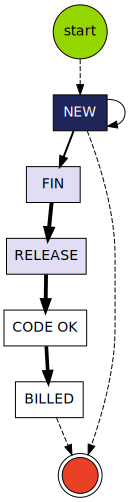

In [7]:
MINER(df,50,50)
pm.render()#show_only=False, save_path = "C:\\Users\\ashis\\Desktop\\check.dot")

In [8]:
df1_ru = pd.read_csv("Dataset_1_RU.csv")
df1_ru = df1_ru.drop(['Unnamed: 0'], axis=1)

{'activities': 1, 'paths': 1}


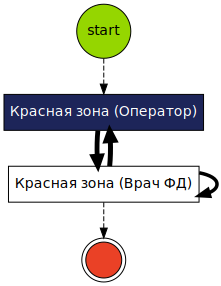

In [9]:
MINER(df1_ru,1,1)
pm.render(show_only=False, save_path = "C:\\Users\\ashis\\Desktop\\RU_D1_MIN_VC.dot")

{'activities': 50, 'paths': 50}


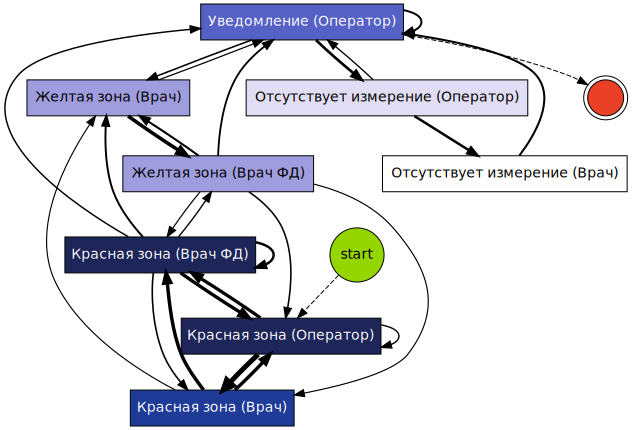

In [10]:
MINER(df1_ru,50,50)
pm.render(show_only=False, save_path = "C:\\Users\\ashis\\Desktop\\RU_D1_HAF_VC.dot")

{'activities': 100, 'paths': 100}


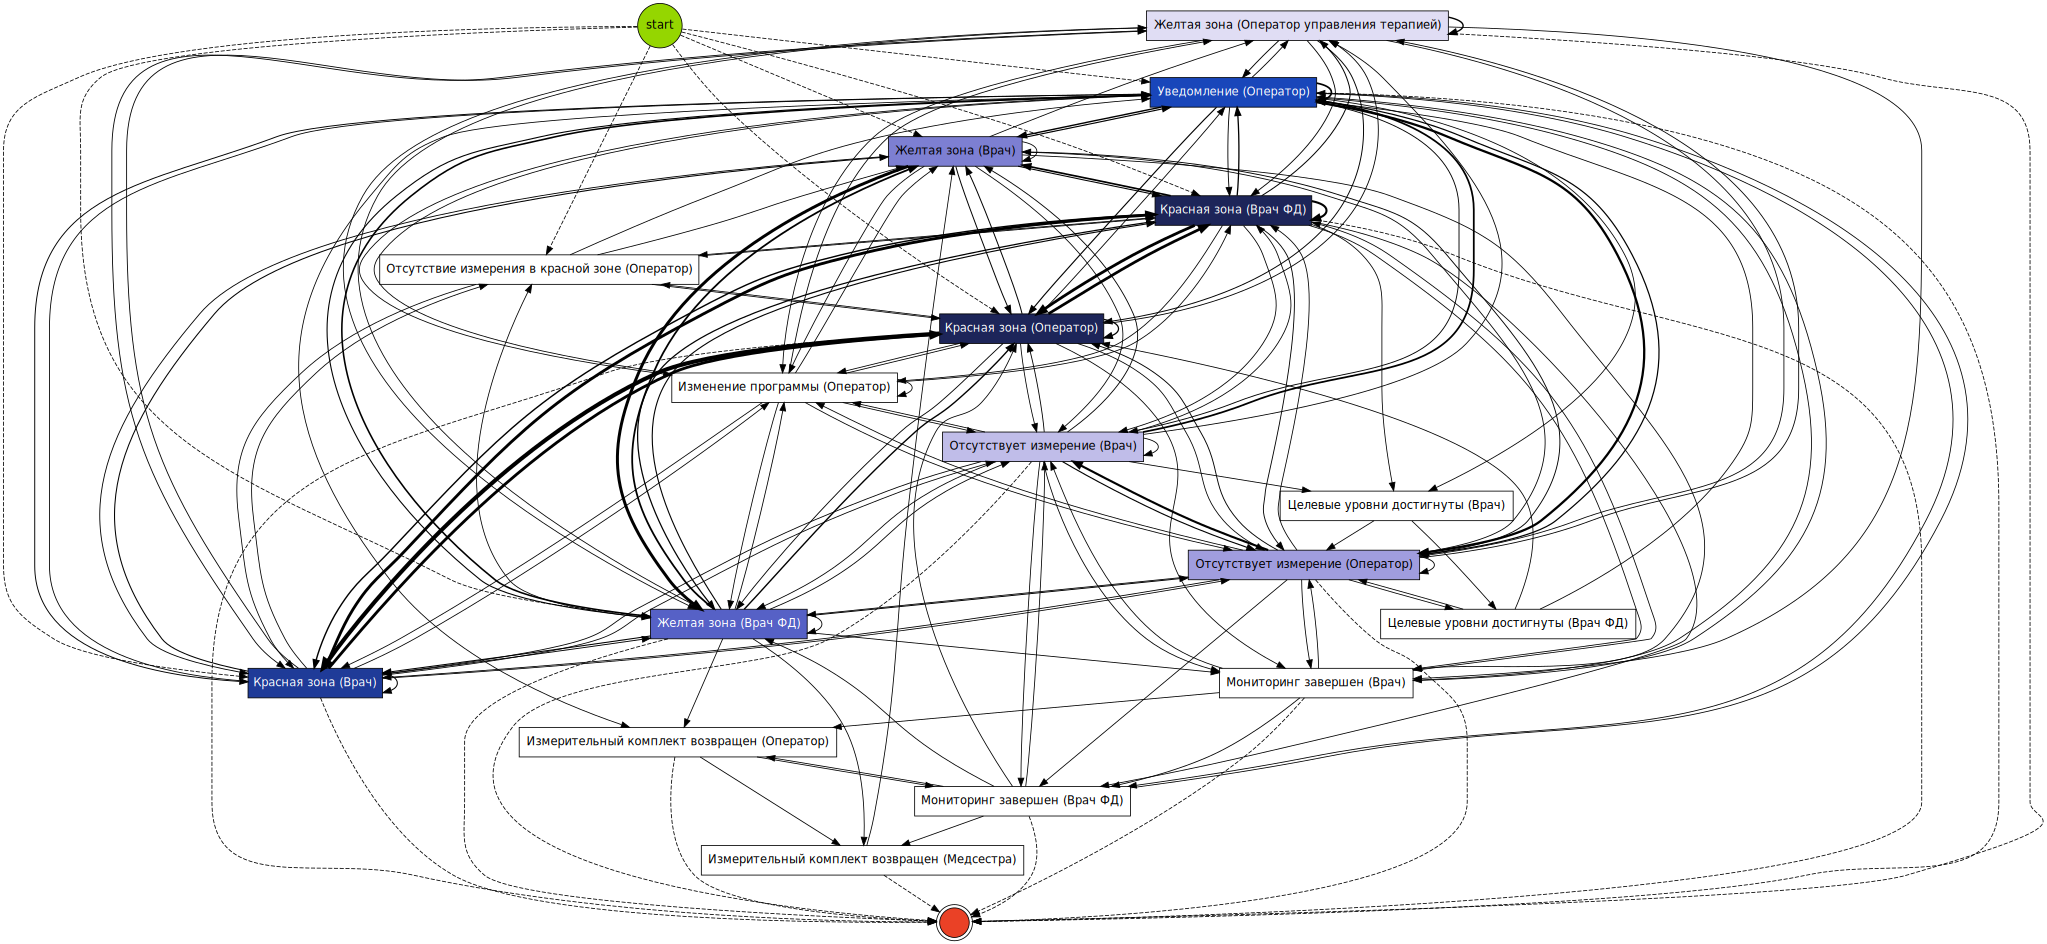

In [11]:
MINER(df1_ru,100,100)
pm.render(show_only=False, save_path = "C:\\Users\\ashis\\Desktop\\RU_D1_FIN_VC.dot")

{'activities': 100, 'paths': 30}


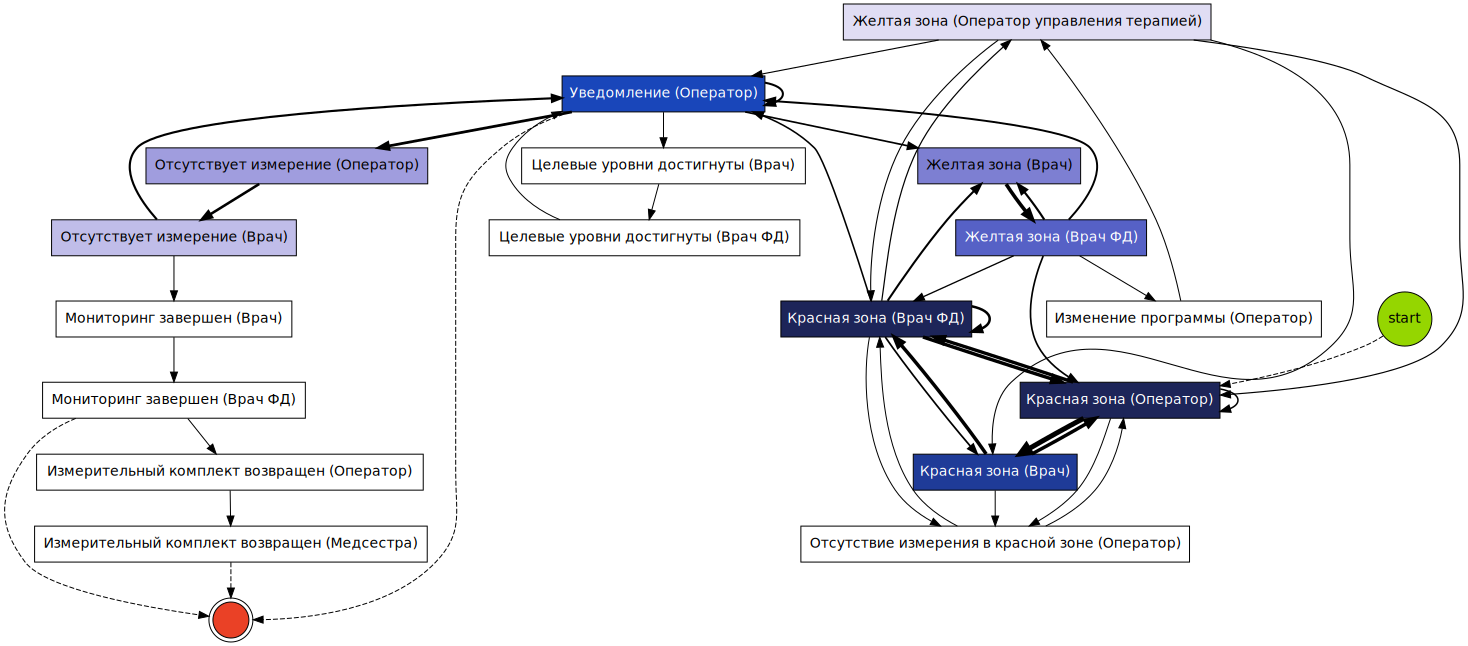

In [12]:
MINER(df1_ru,100,30)
pm.render(show_only=False, save_path = "C:\\Users\\ashis\\Desktop\\RU_D1_OPT_VC.dot")